In [1]:
# Məlumat analizi və işləmə üçün
import pandas as pd
import numpy as np

# Vizualizasiya üçün
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning üçün
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Jupyter-də qrafikləri göstərmək üçün
%matplotlib inline


In [2]:
file_path = r"C:\Users\user\online_retai.csv"

# ';' delimitatoru ilə oxumağa çalışırıq, problemli sətrləri keçirik
df = pd.read_csv(file_path, sep=';', encoding='ISO-8859-1', on_bad_lines='skip')
df.head()


,ï»¿Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [3]:
# Dataset haqqında ümumi məlumat
df.info()

# Boş dəyərlərin sayını göstəririk
df.isnull().sum()

# Əgər lazım olsa ilk 10 sətri görmək
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ï»¿Invoice   541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  object 
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


,ï»¿Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01.12.2010 08:26,"7,65",17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01.12.2010 08:26,"4,25",17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01.12.2010 08:28,"1,85",17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01.12.2010 08:28,"1,85",17850.0,United Kingdom
9,536368,22960,JAM MAKING SET WITH JARS,6,01.12.2010 08:34,"4,25",13047.0,United Kingdom


In [4]:
# Bütün sütun adlarını görək
print(df.columns)


Index(['ï»¿Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


In [5]:
df.rename(columns={'Customer ID': 'CustomerID'}, inplace=True)


In [6]:
print(df.columns)


Index(['ï»¿Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'CustomerID', 'Country'],
      dtype='object')


In [7]:
# Bütün sütun adlarını görək
print(df.columns.tolist())


['ï»¿Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'CustomerID', 'Country']


In [8]:
# TotalAmount = Quantity * Price
df['TotalAmount'] = df['Quantity'] * df['Price']

# Yoxlayaq
df[['Quantity', 'Price', 'TotalAmount']].head()


,Quantity,Price,TotalAmount
0,6,"2,55","2,552,552,552,552,552,55"
1,6,"3,39","3,393,393,393,393,393,39"
2,8,"2,75","2,752,752,752,752,752,752,752,75"
3,6,"3,39","3,393,393,393,393,393,39"
4,6,"3,39","3,393,393,393,393,393,39"


In [9]:
df = df[df['CustomerID'].notnull()]


In [10]:
customer_df = df.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

customer_df.head()


,CustomerID,Quantity,TotalAmount
0,12346.0,0,"1,041,041,041,041,041,041,041,041,041,041,041,..."
1,12347.0,2458,"2,12,12,12,12,12,12,12,12,12,12,12,14,254,254,..."
2,12348.0,2341,"0,550,550,550,550,550,550,550,550,550,550,550,..."
3,12349.0,631,"7,57,59,959,952,952,952,952,952,952,954,254,25..."
4,12350.0,197,"2,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12..."


In [11]:
df.loc[:, 'TotalAmount'] = df['Quantity'] * df['Price']



In [12]:
customer_df = df.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalAmount': 'sum'
}).reset_index()


In [13]:
customer_df = customer_df.dropna(subset=['Quantity', 'TotalAmount'])


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1️⃣ TotalAmount sütununu yarat
df['TotalAmount'] = pd.to_numeric(df['Quantity'], errors='coerce') * pd.to_numeric(df['Price'], errors='coerce')

# NaN-ləri sil
df = df.dropna(subset=['Quantity', 'Price', 'TotalAmount'])

# 2️⃣ Müştəri səviyyəsində qruplaşdır
customer_df = df.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

# 3️⃣ Standartlaşdırma (K-Means üçün vacibdir)
X = customer_df[['Quantity', 'TotalAmount']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4️⃣ K-Means tətbiq et
kmeans = KMeans(n_clusters=4, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Nəticəni yoxla
print(customer_df.head())


   CustomerID  Quantity  TotalAmount  Cluster
0     12348.0         9        360.0        0
1     12349.0         1        300.0        0
2     12350.0         1         40.0        0
3     12352.0         7        280.0        0
4     12356.0        18        324.0        0


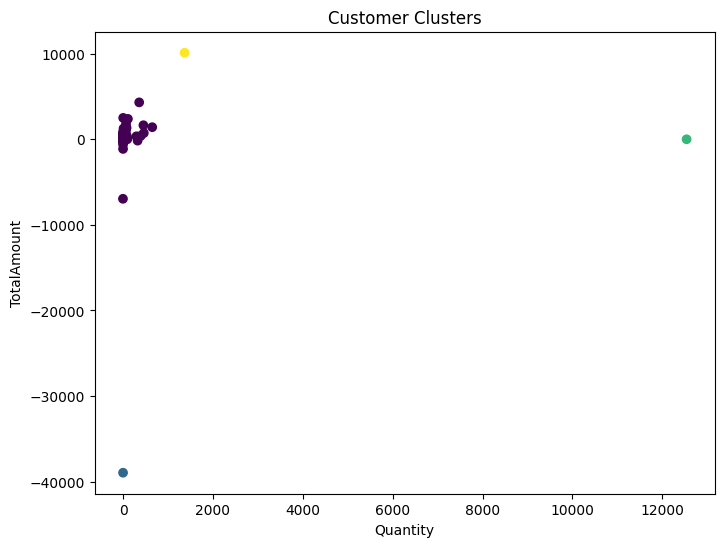

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(customer_df['Quantity'], customer_df['TotalAmount'], c=customer_df['Cluster'], cmap='viridis')
plt.xlabel('Quantity')
plt.ylabel('TotalAmount')
plt.title('Customer Clusters')
plt.show()
